# **Evaluación de modelos de clasificación**

En esta práctica, veremos cómo evaluar un modelo de clasificación con las diversas métricas vistas en la parte teórica.

Trabajaremos con uno de los datasets provisto por Scikit-learn referente a Iris.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Cargamos el dataset y definimos las variables X e Y
iris = datasets.load_iris()
X = iris.data 
y = iris.target

In [43]:
# Cantidad de registros
len(y)

150

Ahora que definimos nuestras variables predictoras **X** y la etiqueta a predecir **y**, vamos a separar nuestros datos en entrenamiento y testeo. Utilizaremos el 20% del dataset para evaluar.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Vamos a trabajar con un modelo de vecinos más cercanos. Seguimos el flujo de trabajo de ML en Scikit-learn.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos el modelo clasificador
    
classifier = KNeighborsClassifier(n_neighbors=2)

In [37]:
# Entrenamos el modelo. Para ello, usamos nuestro set de entrenamiento

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [38]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = classifier.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = classifier.predict(X_test)

## **`Matriz de confusión`**

Veamos la matriz de nuestro modelo

In [39]:
from sklearn.metrics import confusion_matrix

# Aplicamos la matriz de confusion a los datos train y test
matrix = confusion_matrix(y_train, y_train_pred) # param: valor esperado, valor predicho
matrix_2 = confusion_matrix(y_test, y_test_pred)

In [40]:
# Matriz de confusion para cada una de las clases (3 clases de flores)
matrix
# La diagonal son los casos que el modelo acerto

array([[40,  0,  0],
       [ 0, 41,  0],
       [ 0,  4, 35]], dtype=int64)

In [41]:
matrix_2

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

*Grafiquemos la matriz*

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)


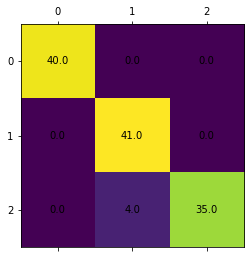

In [43]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

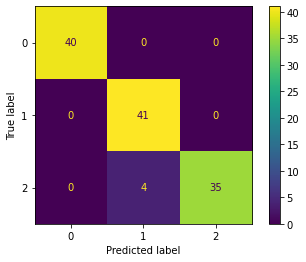

In [44]:
# Otra forma más sencilla de realizar la gráfica es la siguiente

cm_display.plot()
plt.show()

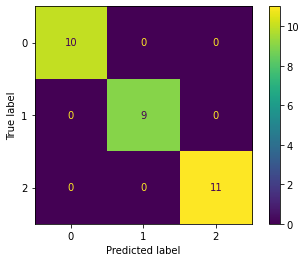

In [45]:
cm_display_2.plot()
plt.show()

- Precision nos da la calidad de la predicción: <br>
¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
- Recall nos da la cantidad: <br>
¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
- F1 combina Precision y Recall en una sola medida
- La Matriz de Confusión indica qué tipos de errores se cometen

Si es binario: La precision y recall va a ser respecto a los positivos o negativos. <br>
Si es multiclase: La precision y recall va a ser respecto a cada clase

### **`Exactitud`** Usar solo si las clases estan balanceadas.
Es el porcentaje total de casos favorables. <br>
La mayoría de los clientes no están interesados en la oferta, así que es muy fácil acertar diciendo que no lo van a estar.

In [46]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

1.0


### **`Precisión`** Mide la calidad del modelo en tareas de clasificación.
Indica cuanto acerto el modelo dentro de todos los positivos (FP y TP) sean correctos o no.<br>
ERROR DE TIPO II<br>
¿qué porcentaje de los clientes que contactemos estarán interesados?

In [47]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred, average= None)
print(precision)
# Lo hace para cada una de las clases 


[1. 1. 1.]


### **`Exhaustividad/Recall/Sensibilidad`** Mide la cantidad que el modelo es capaz de identificar.
Indica cuantos positivos es capaz de identificar el modelo. <br>
ERROR DE TIPO I <br>
¿qué porcentaje de los clientes están interesados somos capaces de identificar?

In [48]:
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred, average= None)
print(precision)

[1. 1. 1.]


### **`F1-Score`** combina las medidas de precision y recall en un sólo valor.<br>
El valor F1 asume que nos importa de igual forma la precisión y la exhaustividad


In [49]:
from sklearn.metrics import f1_score

precision = f1_score(y_test, y_test_pred, average= None)
print(precision, type(precision))

[1. 1. 1.] <class 'numpy.ndarray'>



### **`Curvas ROC`**


Dejamos [aquí](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) la documentación pertinente.

Debemos trabajar con un método del preprocesamiento de datos -denominado *label_binarize*- que permita abordar un problema  de clasificación multiclase como si fuese binario. Esto lo hacemos ya que la métrica ROC se emplea para problemas binarios. Dejamos la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html) para que se interioricen un poco más acerca de esta función.

In [50]:
from sklearn.preprocessing import label_binarize
# Tranforma una clasificacion multiclase a tipo binario

In [51]:
# Binarizamos y_test

y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]
print(y_test[:5])

[[0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]]


Hasta este momento, nosotros veníamos trabajando con el método `predict` para poder predecir una etiqueta para un registro. 

Ahora veremos la funcionalidad de `predict_proba`, que indica la probabilidad de que una instancia pertenezca a una de las categorías de la variable de salida.

In [57]:
y_score = classifier.predict_proba(X_test)
print(y_score[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [58]:
# Computamos los valores de FPR (Tasa de falsos positivos) y TPR (tasa de verdaderos positivos), para luego realizar
# el gráfico de la curva ROC.

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Pasamos a graficar

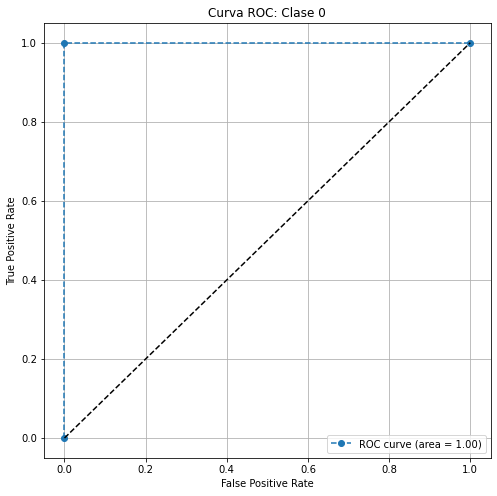

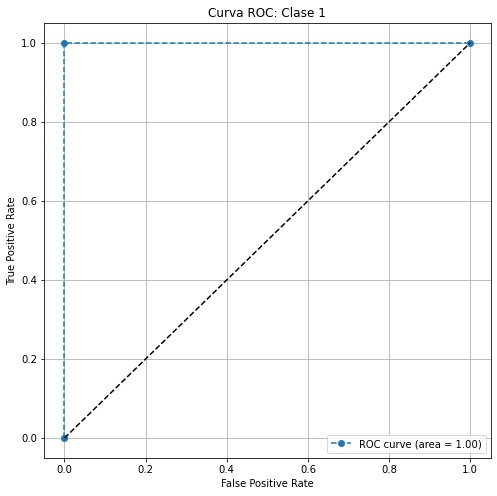

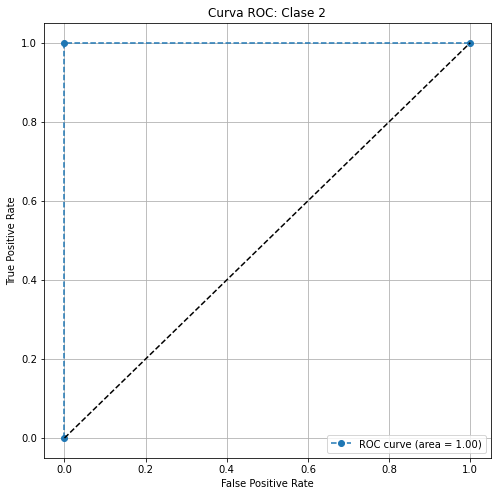

In [54]:
# Recorremos con un bucle cada una de las clases

for i in range(n_classes):
    plt.figure(figsize=(8,8))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate') # Sensitividad
    plt.ylabel('True Positive Rate') # Exhaustividad
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Porcentaje entre 0 y 1
# La diagonal es la curva de ROC, al cambiar el umbral nos movemos sobre esa curva

Medimos el AUC (Area Bajo la Curva)

In [55]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score


def multiclass_roc_auc_score(y_test, y_pred, average= 'macro'):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [56]:
print('El AUC-ROC multiclase:',multiclass_roc_auc_score(y_test, y_test_pred))
# Arriba de 0.8 indica que funciona muy bien

El AUC-ROC multiclase: 1.0
